In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


##Klasifikasi
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#wrapper method
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score

#METHOD EVALUATION
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
#create names of the feature
col_names = ["duration","total_fiat","total_biat","min_fiat","min_biat","max_fiat","max_biat","mean_fiat","mean_biat","flowPktsPerSecond","flowBytesPerSecond","min_flowiat","max_flowiat","mean_flowiat","std_flowiat","min_active","mean_active","max_active","std_active","min_idle","mean_idle","max_idle","std_idle"]

#import dataset
df = pd.read_csv('dataset/scenarioA1/TimeBasedFeatures-Dataset-120s-VPN.csv')

df = df.drop_duplicates()
df = df.dropna()

#separate dataset with label
dfX = df.drop('class1',1)
dfY = df.class1

#scenario1
dfY = dfY.replace({'Non-VPN' : 1, 'VPN' : 2})

#scenario2
#dfY = dfY.replace({'BROWSING' : 1, 'P2P' : 2, 'FT' : 3, 'MAIL' : 4, 'VOIP' : 5, 'CHAT' : 6, 'STREAMING' : 7, 'VPN-BROWSING' : 8, 'VPN-P2P' : 9, 'VPN-FT' : 10, 'VPN-MAIL' : 11, 'VPN-VOIP' : 12, 'VPN-CHAT' : 13, 'VPN-STREAMING' : 14})

#scenario3
#dfY = dfY.replace({'BROWSING' : 1, 'P2P' : 2, 'FT' : 3, 'MAIL' : 4, 'VOIP' : 5, 'CHAT' : 6, 'STREAMING' : 7})

#Split data training & data testing
X_train_filter, X_test_filter, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.3, random_state=42)

#list column names
colNames=list(X_train_filter)
colNames_test=list(X_test_filter)

constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train_filter)
X_train = constant_filter.transform(X_train_filter)
X_test = constant_filter.transform(X_test_filter)

print(X_train.shape)
print(X_test.shape)

#Data normalization
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

#cek the standard deviation
print(X_train.std(axis=0))

(6667, 23)
(2858, 23)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
anova_filter = SelectKBest(f_regression)
clf2 = LinearSVC()
anova_svm = Pipeline([('anova', anova_filter), ('linearSVC', clf2)])

anova_svm_scores = list()
acc_scores = list()
distance = list()

for k in range(1,24,1):
    anova_svm.set_params(anova__k=k).fit(X_train, Y_train)
    y = anova_svm.decision_function(X_train)
    coef = anova_svm[:-1].inverse_transform(anova_svm['linearSVC'].coef_)
    w_norm = np.linalg.norm(coef)
    dist = y / w_norm
    dist_mean = np.mean(dist)
    distance.append(dist_mean)
#     prediction = anova_svm.predict(X_train)
#     sc = anova_svm.score(X_train,Y_train)
#     pred = anova_svm.predict(X_test)
#     acc = accuracy_score(Y_test, pred)
#     anova_svm_scores.append(sc)
#     acc_scores.append(acc)

print("Distance SVM : ")
for a in range(0,23,1):
    print("fiture ke-",a+1,"=",distance[a])

# print("Anova-SVM Scores : ")
# for a in range(0,23,1):
#     print("fitur ke-",a+1,"=",anova_svm_scores[a])
# print("Accuracy Scores : ")
# for b in range(0,23,1):
#     print("fitur ke-",b+1,"=",acc_scores[b])
    
#anova_svm.named_steps['anova'].get_support()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Distance SVM : 
fiture ke- 1 = -0.30431566027885654
fiture ke- 2 = -0.375466086971976
fiture ke- 3 = -0.007035399253907069
fiture ke- 4 = -0.006953808699762736
fiture ke- 5 = -0.007050174901425893
fiture ke- 6 = -0.007039412548139572
fiture ke- 7 = -0.006845322310228013
fiture ke- 8 = -0.006866791904650011
fiture ke- 9 = -0.006920968047559849
fiture ke- 10 = -0.006786795202921477
fiture ke- 11 = -0.0066089922119646205
fiture ke- 12 = -0.006658284241172336
fiture ke- 13 = -0.006862080916721545
fiture ke- 14 = -0.005747943779591142
fiture ke- 15 = -0.00589476488224471
fiture ke- 16 = -0.006057862908480393
fiture ke- 17 = -0.006070024930342694
fiture ke- 18 = -0.0060051176460516435
fiture ke- 19 = -0.004992775702792706
fiture ke- 20 = -0.005266406296603902
fiture ke- 21 = -0.005287237694501054
fiture ke- 22 = -0.0054471029395996495
fiture ke- 23 = -0.005257881210563212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


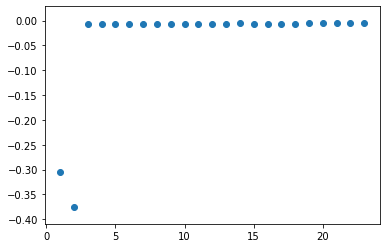

In [4]:
xCor = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.scatter(xCor, distance, marker='o')

In [5]:
sel_features = []
thres = np.mean(distance)
for x in range(0,23,1):
    if distance[x] > thres:
        sel_features.append(True)
    elif distance[x] < thres:
        sel_features.append(False)
print(sel_features)
print(thres)
print("value")
for y in distance:
    print(y)

[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
-0.03527986502087203
value
-0.30431566027885654
-0.375466086971976
-0.007035399253907069
-0.006953808699762736
-0.007050174901425893
-0.007039412548139572
-0.006845322310228013
-0.006866791904650011
-0.006920968047559849
-0.006786795202921477
-0.0066089922119646205
-0.006658284241172336
-0.006862080916721545
-0.005747943779591142
-0.00589476488224471
-0.006057862908480393
-0.006070024930342694
-0.0060051176460516435
-0.004992775702792706
-0.005266406296603902
-0.005287237694501054
-0.0054471029395996495
-0.005257881210563212


In [6]:
print(max(distance))
print(min(distance))
print(np.mean(distance))

-0.004992775702792706
-0.375466086971976
-0.03527986502087203


In [7]:
colNum = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
true = sel_features
colindex = [i for i, x in enumerate(true) if x]
colNumber = list(colNum[i] for i in colindex)
print(colNumber)

colindex2 = [i for i, x in enumerate(true) if x]
colName = list(colNames[i] for i in colindex)
print(colName)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
['total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle']


In [8]:
temp = pd.DataFrame(X_train)
X_train_new = temp[colNumber]
X_train_new.shape

(6667, 21)

In [9]:
#all features
#create classifier
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
lgr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
svm = SVC()
knn = KNeighborsClassifier()
nvb = GaussianNB()

#Fit the model
clf.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)
lgr.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
nvb.fit(X_train, Y_train)

#create predicted data
clf_predict = clf.predict(X_test)
rfc_predict = rfc.predict(X_test)
lgr_predict = lgr.predict(X_test)
svm_predict = svm.predict(X_test)
knn_predict = knn.predict(X_test)
nvb_predict = nvb.predict(X_test)

#--------------------------------------------------------------------#

#Selected features
#reduce features in test dataset
#create classifier
X_test_new = X_test[:,colindex]
clf_sel = DecisionTreeClassifier(random_state=0)
rfc_sel = RandomForestClassifier(random_state=0)
lgr_sel = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
svm_sel = SVC()
knn_sel = KNeighborsClassifier()
nvb_sel = GaussianNB()

#fit the model
clf_sel.fit(X_train_new, Y_train)
rfc_sel.fit(X_train_new, Y_train)
lgr_sel.fit(X_train_new, Y_train)
svm_sel.fit(X_train_new, Y_train)
knn_sel.fit(X_train_new, Y_train)
nvb_sel.fit(X_train_new, Y_train)

#create predicted data
clf_predict_sel = clf_sel.predict(X_test_new)
rfc_predict_sel = rfc_sel.predict(X_test_new)
lgr_predict_sel = lgr_sel.predict(X_test_new)
svm_predict_sel = svm_sel.predict(X_test_new)
knn_predict_sel = knn_sel.predict(X_test_new)
nvb_predict_sel = nvb_sel.predict(X_test_new)

In [10]:
# cm = confusion_matrix(Y_test_all, Y_all_pred)
# print(pd.crosstab(Y_test_all, Y_all_pred, rownames=['Actual activity'], colnames=['Predicted activity']))
# # print(classification_report(Y_test, Y_all_pred))
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]
# TN = cm[0][0]
# accuracy_all = (TP+TN)/(TP+TN+FP+FN)
# sensitivity_all = TP/(TP+FN)
# specificity_all = TN/(TN+FP)
# false_alarm_all = FP/(FP+TN)

#Accuracy
#all features
print("Performance of all features : ")
print("Accuracy of Decision Tree =  ", accuracy_score(Y_test, clf_predict))
print("Accuracy of Random Forest =  ", accuracy_score(Y_test, rfc_predict))
print("Accuracy of Logistic Regression =  ", accuracy_score(Y_test, lgr_predict))
print("Accuracy of SVM =  ", accuracy_score(Y_test, svm_predict))
print("Accuracy of KNN =  ", accuracy_score(Y_test, knn_predict))
print("Accuracy of Naive Bayes =  ", accuracy_score(Y_test, nvb_predict))
print()

#selected features
print("Performance of selected features : ")
print("Accuracy of Decision Tree =  ", accuracy_score(Y_test, clf_predict_sel))
print("Accuracy of Random Forest =  ", accuracy_score(Y_test, rfc_predict_sel))
print("Accuracy of Logistic Regression =  ", accuracy_score(Y_test, lgr_predict_sel))
print("Accuracy of SVM =  ", accuracy_score(Y_test, svm_predict_sel))
print("Accuracy of KNN =  ", accuracy_score(Y_test, knn_predict_sel))
print("Accuracy of Naive Bayes =  ", accuracy_score(Y_test, nvb_predict_sel))
print()

#selected with cross-validation
accuracy = cross_val_score(clf_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
accuracy = cross_val_score(rfc_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
accuracy = cross_val_score(lgr_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
accuracy = cross_val_score(svm_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
accuracy = cross_val_score(knn_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
accuracy = cross_val_score(nvb_sel, X_test_new, Y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Performance of all features : 
Accuracy of Decision Tree =   0.5010496850944717
Accuracy of Random Forest =   0.5850244926522044
Accuracy of Logistic Regression =   0.5542337298810357
Accuracy of SVM =   0.6186144156752974
Accuracy of KNN =   0.6504548635409377
Accuracy of Naive Bayes =   0.4793561931420574

Performance of selected features : 
Accuracy of Decision Tree =   0.5538838348495452
Accuracy of Random Forest =   0.5937718684394682
Accuracy of Logistic Regression =   0.5545836249125262
Accuracy of SVM =   0.6004198740377886
Accuracy of KNN =   0.6763470958712386
Accuracy of Naive Bayes =   0.480405878236529

Accuracy: 0.81070 (+/- 0.05124)
Accuracy: 0.86214 (+/- 0.03527)
Accuracy: 0.54514 (+/- 0.05122)
Accuracy: 0.58818 (+/- 0.05102)
Accuracy: 0.76278 (+/- 0.04818)
Accuracy: 0.48252 (+/- 0.04330)


## COMPUTATION TIME

In [11]:
import time
start = time.time()

### ALL features

In [12]:
start1 = time.time()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)
time1 = (time.time()-start1)

In [13]:
start2 = time.time()
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)
rfc_predict = rfc.predict(X_test)
time2 = (time.time()-start2)

In [14]:
start3 = time.time()
lgr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
lgr.fit(X_train, Y_train)
lgr_predict = lgr.predict(X_test)
time3 = (time.time()-start3)

In [15]:
start4 = time.time()
svm = SVC()
svm.fit(X_train, Y_train)
svm_predict = svm.predict(X_test)
time4 = (time.time()-start4)

In [16]:
start5 = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
time5 = (time.time()-start5)

In [17]:
start6 = time.time()
nvb = GaussianNB()
nvb.fit(X_train, Y_train)
nvb_predict = nvb.predict(X_test)
time6 = (time.time()-start6)

In [18]:
print(time1)
print(time2)
print(time3)
print(time4)
print(time5)
print(time6)

0.20586943626403809
2.1302003860473633
0.22985529899597168
3.988807439804077
0.5232176780700684
0.013994216918945312


### Selected features

In [19]:
X_test_new = X_test[:,colindex]

In [20]:
start7 = time.time()
clf_sel = DecisionTreeClassifier(random_state=0)
clf_sel.fit(X_train_new, Y_train)
clf_predict_sel = clf_sel.predict(X_test_new)
time7 = (time.time()-start7)

In [21]:
start8 = time.time()
rfc_sel = RandomForestClassifier(random_state=0)
rfc_sel.fit(X_train_new, Y_train)
rfc_predict_sel = rfc_sel.predict(X_test_new)
time8 = (time.time()-start8)

In [22]:
start9  = time.time()
lgr_sel = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
lgr_sel.fit(X_train_new, Y_train)
lgr_predict_sel = lgr_sel.predict(X_test_new)
time9 = (time.time()-start9)

In [23]:
start10 = time.time()
svm_sel = SVC()
svm_sel.fit(X_train_new, Y_train)
svm_predict_sel = svm_sel.predict(X_test_new)
time10 = (time.time()-start10)

In [24]:
start11 = time.time()
knn_sel = KNeighborsClassifier()
knn_sel.fit(X_train_new, Y_train)
knn_predict_sel = knn_sel.predict(X_test_new)
time11 = (time.time()-start11)

In [25]:
start12 = time.time()
nvb_sel = GaussianNB()
nvb_sel.fit(X_train_new, Y_train)
nvb_predict_sel = nvb_sel.predict(X_test_new)
time12 = (time.time()-start12)

In [26]:
print(time7)
print(time8)
print(time9)
print(time10)
print(time11)
print(time12)

0.1669008731842041
2.044292449951172
0.2258608341217041
3.831047534942627
0.8958945274353027
0.015991926193237305


In [27]:
# n_feat = 9
# anova_fil = SelectKBest(f_regression)
# clf = SVC()
# anova_svm_sel = Pipeline([('anova', anova_fil), ('SVC',clf)])

# anova_svm_sel.set_params(anova__k=n_feat).fit(X_train, Y_train)
# prediction2 = anova_svm_sel.predict(X_train)
# anova_svm_sel.score(X_train, Y_train)

# anova_svm_sel.named_steps['anova'].get_support()
# colNum = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
# true = anova_svm_sel.named_steps['anova'].get_support()

In [28]:
# anova_filter = SelectKBest(f_regression)
# clf2 = SVC(kernel='linear')
# anova_svm = Pipeline([('anova', anova_filter), ('SVC', clf2)])
# num_k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# anova_svm_scores = list()
# acc_scores = list()

# for k in num_k:
#     anova_svm.set_params(anova__k=k).fit(X_train, Y_train)
#     #anova-SVM scores
#     anova_svm_scores_pred = anova_svm.predict(X_train)
#     sc = anova_svm_scores_pred.score(X_train,Y_train)
#     anova_svm_scores.append(sc)
#     #accuracy scores
#     acc_pred = anova_svm.predict(X_test)
#     acc = accuracy_score(Y_test, acc_pred)
#     acc_scores.append(acc)

# print("Anova-SVM Scores : ")
# print(anova_svm_scores)
# print("Accuracy Scores : ")
# print(acc)s
# print(anova_svm.named_steps['anova'].get_support())

In [29]:
# transform2 = SelectKBest(f_regression)
# clf2 = Pipeline([('anova', transform2), ('svc', SVC(C=0.1))])

# score_means2 = list()
# score_stds2 = list()
# k = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)

# for percentile in k:
#     clf2.set_params(anova__k=percentile)
#     this_scores = cross_val_score(clf2, X_train, Y_train, n_jobs=1)
#     score_means2.append(this_scores.mean())
#     score_stds2.append(this_scores.std())
    
# plt.errorbar(k, score_means2, np.array(score_stds2))

# plt.title('Performance of the SVM-ANOVA varying the percentile of features selected')
# plt.xlabel('Percentile')
# plt.ylabel('Prediction rate')

# plt.axis('tight')
# plt.show()

In [30]:
# transform = SelectPercentile(f_classif)
# clf = Pipeline([('anova', transform), ('svc', SVC(C=1.0))])

# score_means = list()
# score_stds = list()
# percentiles = (1,3,6,10,15,20,30,40,60,80,100)

# for percentile in percentiles:
#     clf.set_params(anova__percentile=percentile)
#     this_scores = cross_val_score(clf, X_train, Y_train, cv=10, n_jobs=1)
#     score_means.append(this_scores.mean())
#     score_stds.append(this_scores.std())
    
# plt.errorbar(percentiles, score_means, np.array(score_stds))

# plt.title('Performance of the SVM-ANOVA varying the percentile of features selected')
# plt.xlabel('Percentile')
# plt.ylabel('Prediction rate')

# plt.axis('tight')
# plt.show()

In [31]:
import sys

print(sys.version)

3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]
